In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/starratingprediction-part-2/__results__.html
/kaggle/input/starratingprediction-part-2/__resultx__.html
/kaggle/input/starratingprediction-part-2/__notebook__.ipynb
/kaggle/input/starratingprediction-part-2/__output__.json
/kaggle/input/starratingprediction-part-2/custom.css
/kaggle/input/starratingprediction-part-2/models/model_uni75.sav
/kaggle/input/starratingprediction-part-2/models/vectorizer_uni25.sav
/kaggle/input/starratingprediction-part-2/models/model_tri25.sav
/kaggle/input/starratingprediction-part-2/models/model_uni50.sav
/kaggle/input/starratingprediction-part-2/models/vectorizer_uni50.sav
/kaggle/input/starratingprediction-part-2/models/vectorizer_bi25.sav
/kaggle/input/starratingprediction-part-2/models/vectorizer_uni75.sav
/kaggle/input/starratingprediction-part-2/models/vectorizer_tri25.sav
/kaggle/input/starratingprediction-part-2/models/model_uni25.sav
/kaggle/input/starratingprediction-part-2/models/model_bi50.sav
/kaggle/input/starratingprediction-pa

# **Star Rating prediction (Part-4)**

**In this notebook, we are going to test Naive Bayes Classifiers trained earlier in <a href="https://www.kaggle.com/rajatagg/star-rating-prediction-part-2?scriptVersionId=88922233">Part-2</a>**

* <a href="https://www.kaggle.com/rajatagg/star-rating-prediction-part-1?scriptVersionId=84763077">Part-1: Data Analysis and text preprocessing</a>
* <a href="https://www.kaggle.com/rajatagg/star-rating-prediction-part-2">Part-2: Feature vector generation using Multinomial Naive Bayes Classifier</a>
* <a href="https://www.kaggle.com/rajatagg/starratingprediction-part-3/notebook">Part-3: Training and testing using Random Forest Algorithm</a>

> **Loading the test dataset**

In [2]:
X_test_df = pd.read_csv('/kaggle/input/amazon-mobile-phone-reviews-dataset/SRPtest.csv')

In [3]:
X_test_df.head()

,Reviews,Rating
0,I've been a long time fan of lg's phones and l...,5
1,"Great Phone for the price, very quickly. The c...",5
2,Bye bye iPhone. After much research and many q...,5
3,Allí was ver y fine,5
4,"The ringer volume is poor, It needs beefing up",4


In [6]:
#  its a python script containing functions used in preprocessing
import functions_for_text_preprocessing as pptext

In [7]:
pptext.all_functions()

'This module contain : expandContractions, tokenization, removeStopwords, lemmatizeText, preprocess_review, getWordCount, getReviewLength.\nReview text is the only input'

> **preprocessing the text data**

In [8]:
X_test_df['Reviews'] = X_test_df['Reviews'].apply(pptext.preprocess_review)

> **importing the library to load the saved models**

In [9]:
import joblib

In [10]:
#function to load the saved model
def loading_joblibPickle(vectorizer_name, model_name):
    fpath = "../input/starratingprediction-part-2/models/"
    vectorizer = joblib.load(fpath+vectorizer_name+".sav")
    model = joblib.load(fpath+model_name+".sav")
    return vectorizer, model

#  **1. (Unigram, 75)**

In [11]:
vectorizer, model = loading_joblibPickle("vectorizer_uni75", "model_uni75")

> **generating the feature vector using learned vectorizer**

In [12]:
fvector = vectorizer.transform(X_test_df['Reviews']).toarray()

> **making predictions**

In [13]:
y_pred = model.predict(fvector)

> **Classification score**

In [14]:
from sklearn.metrics import accuracy_score, classification_report

In [15]:
target_names = ['1', '2', '3', '4', '5']
classification_score = classification_report(X_test_df['Rating'], y_pred, target_names=target_names)
print(classification_score)
print("Classfication Report for (Unigrams,75)\n\n")

              precision    recall  f1-score   support

           1       0.60      0.84      0.70     21701
           2       0.62      0.02      0.04      7417
           3       0.40      0.10      0.16      9529
           4       0.37      0.25      0.30     18412
           5       0.76      0.89      0.82     67075

    accuracy                           0.68    124134
   macro avg       0.55      0.42      0.41    124134
weighted avg       0.64      0.68      0.63    124134

Classfication Report for (Unigrams,75)




#  **2. (Unigram, 50)**

In [16]:
vectorizer, model=loading_joblibPickle("vectorizer_uni50", "model_uni50")

In [17]:
fvector = vectorizer.transform(X_test_df['Reviews']).toarray()
y_pred = model.predict(fvector)

In [18]:
classification_score = classification_report(X_test_df['Rating'], y_pred, target_names=target_names)
print(classification_score)
print("Classfication Report for (Unigrams,50)\n\n")

              precision    recall  f1-score   support

           1       0.56      0.86      0.68     21701
           2       0.42      0.02      0.05      7417
           3       0.27      0.13      0.18      9529
           4       0.34      0.24      0.28     18412
           5       0.78      0.85      0.82     67075

    accuracy                           0.66    124134
   macro avg       0.48      0.42      0.40    124134
weighted avg       0.62      0.66      0.62    124134

Classfication Report for (Unigrams,50)




#  **3. (Bigram, 50)**

In [19]:
vectorizer, model=loading_joblibPickle("vectorizer_bi50", "model_bi50")

In [20]:
fvector = vectorizer.transform(X_test_df['Reviews']).toarray()
y_pred = model.predict(fvector)

In [21]:
classification_score = classification_report(X_test_df['Rating'], y_pred, target_names=target_names)
print(classification_score)
print("Classfication Report for (Bigrams,50)\n\n")

              precision    recall  f1-score   support

           1       0.68      0.76      0.72     21701
           2       0.97      0.06      0.12      7417
           3       0.85      0.10      0.17      9529
           4       0.52      0.17      0.26     18412
           5       0.71      0.97      0.82     67075

    accuracy                           0.70    124134
   macro avg       0.74      0.41      0.42    124134
weighted avg       0.70      0.70      0.63    124134

Classfication Report for (Bigrams,50)




# **4. (Unigram, 25)**

In [22]:
vectorizer, model=loading_joblibPickle("vectorizer_uni25", "model_uni25")

In [23]:
fvector = vectorizer.transform(X_test_df['Reviews']).toarray()
y_pred = model.predict(fvector)

In [24]:
classification_score = classification_report(X_test_df['Rating'], y_pred, target_names=target_names)
print(classification_score)
print("Classfication Report for (Unigrams,25)\n\n")

              precision    recall  f1-score   support

           1       0.50      0.87      0.63     21701
           2       0.16      0.03      0.05      7417
           3       0.20      0.19      0.19      9529
           4       0.31      0.19      0.24     18412
           5       0.81      0.77      0.79     67075

    accuracy                           0.62    124134
   macro avg       0.39      0.41      0.38    124134
weighted avg       0.59      0.62      0.59    124134

Classfication Report for (Unigrams,25)




# **5. (Bigram,25)**

In [25]:
vectorizer, model=loading_joblibPickle("vectorizer_bi25", "model_bi25")

In [26]:
fvector = vectorizer.transform(X_test_df['Reviews']).toarray()
y_pred = model.predict(fvector)

In [27]:
classification_score = classification_report(X_test_df['Rating'], y_pred, target_names=target_names)
print(classification_score)
print("Classfication Report for (Bigrams,25)\n\n")

              precision    recall  f1-score   support

           1       0.62      0.68      0.65     21701
           2       0.81      0.03      0.05      7417
           3       0.43      0.05      0.10      9529
           4       0.35      0.16      0.22     18412
           5       0.70      0.94      0.80     67075

    accuracy                           0.66    124134
   macro avg       0.58      0.37      0.36    124134
weighted avg       0.62      0.66      0.59    124134

Classfication Report for (Bigrams,25)




# **6. (Trigram,25)**

In [28]:
vectorizer, model = loading_joblibPickle("vectorizer_tri25", "model_tri25")

In [29]:
fvector = vectorizer.transform(X_test_df['Reviews'])
y_pred = model.predict(fvector)

In [30]:
classification_score = classification_report(X_test_df['Rating'], y_pred, target_names=target_names)
print(classification_score)
print("Classfication Report for (Trigrams,25)\n\n")

              precision    recall  f1-score   support

           1       0.70      0.18      0.28     21701
           2       0.91      0.02      0.03      7417
           3       0.66      0.02      0.04      9529
           4       0.52      0.06      0.10     18412
           5       0.57      0.99      0.72     67075

    accuracy                           0.58    124134
   macro avg       0.67      0.25      0.23    124134
weighted avg       0.61      0.58      0.46    124134

Classfication Report for (Trigrams,25)




# **<div style="text-align:center">Performance of Multinomial Naive Bayes Classifier</div>**

<div>
<div style="float:left">
<table style="border: 0.3px solid black">
  <tr>
      <th style="text-align:center" colspan="5">Score of Trainig data</th>
    </tr>
    <tr style="border: 0.1px solid black">
    <th>(Ngram, Review Length(less than))</th>
    <th>Accuracy</th>
    <th>Precision</th>
    <th>Recall</th>
    <th>F1-Score</th>
  </tr>
    <tr>
    <td>Unigram, 75</td>    
    <td>0.76</td>
    <td>0.76</td>
    <td>0.76</td>
    <td>0.70</td>
  </tr>
  <tr>
    <td>Unigram, 50</td>   
      <td>0.78</td>
    <td>0.77</td>
    <td>0.78</td>
      <td>0.73</td>
  </tr>
  <tr>
    <td>Bigram, 50</td> 
   <td>0.83</td>
    <td>0.85</td>
    <td>0.83</td>
    <td>0.80</td>
  </tr>
  <tr>
    <td>Unigram, 25</td>
    <td>0.81</td>
    <td>0.80</td>
    <td>0.81</td>
    <td>0.76</td>
  </tr>
  <tr>
    <td>Bigram, 25</td>
    <td>0.83</td>
    <td>0.84</td>
    <td>0.83</td>
    <td>0.79</td>
  </tr>
  <tr>
    <td>Trigram, 25</td> 
    <td>0.78</td>
    <td>0.83</td>
    <td>0.78</td>
    <td>0.73</td>
  </tr>
</table>
    </div>
    
    
    
 <div style="float:right">
<table style="border: 0.3px solid black">
     <tr>
      <th style="text-align:center" colspan="5">Score of Test data</th>
    </tr>
  <tr style="border: 0.1px solid black">
    <th>(Ngram, Review Length(less than))</th>
    <th>Accuracy</th>
    <th>Precision</th>
    <th>Recall</th>
    <th>F1-Score</th>
  </tr>
    <tr>
    <td>Unigram, 75</td>    
    <td>0.68</td>
    <td>0.64</td>
    <td>0.68</td>
    <td>0.63</td>
    </tr>
  <tr>
    <td>Unigram, 50</td>   
    <td>0.66</td>
    <td>0.62</td>
    <td>0.66</td>
    <td>0.62</td>
  </tr>
  <tr>
    <td>Bigram, 50</td> 
    <td>0.70</td>
    <td>0.70</td>
    <td>0.70</td>
    <td>0.63</td>
  </tr>
    <tr>
    <td>Unigram, 25</td>
    <td>0.62</td>
    <td>0.59</td>
    <td>0.62</td>
    <td>0.59</td>
  </tr>
  <tr>
    <td>Bigram, 25</td>
    <td>0.66</td>
    <td>0.62</td>
    <td>0.66</td>
    <td>0.59</td>
  </tr>
  <tr>
    <td>Trigram, 25</td> 
    <td>0.58</td>
    <td>0.61</td>
    <td>0.58</td>
    <td>0.46</td>
  </tr>
</table>
          </div>
    </div>

# Bigrams are found to be the best amongst all and unigrams are doing good than trigram as well.

# We will be tackling the class imbalance to improve the performance of our classifiers as we can see in the below image how skewed our dataset is!

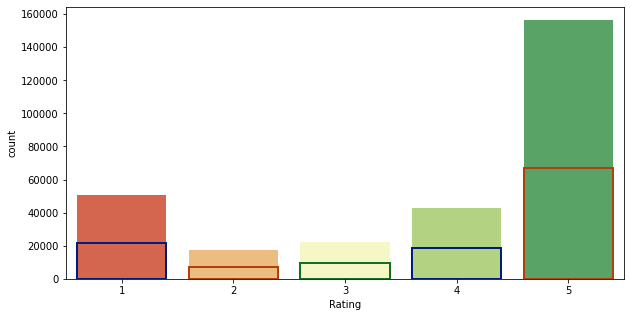

Source of image: <a href="https://www.kaggle.com/rajatagg/star-rating-prediction-part-2?scriptVersionId=88922233">Part-1: Data Preprocessing</a>